In [77]:
# Import scraping modules
from urllib.request import urlopen
from bs4 import BeautifulSoup
# Import data manipulation modules
import pandas as pd
import numpy as np
# Import data visualization modules
import matplotlib as mpl
import matplotlib.pyplot as plt

In [78]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [79]:
# URL of page
url = 'https://www.pro-football-reference.com/years/2020/passing.htm'
# Open URL and pass to BeautifulSoup
html = urlopen(url)
stats_page = BeautifulSoup(html)

In [80]:
# Collect table headers
column_headers = stats_page.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]

In [55]:
print(column_headers)

['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC', 'GWD']


In [81]:
# Collect table rows
rows = stats_page.findAll('tr')[1:]
# Get stats from each row
qb_stats = []
for i in range(len(rows)):
  qb_stats.append([col.getText() for col in rows[i].findAll('td')])

In [82]:
print(qb_stats[0])

['Matt Ryan', 'ATL', '35', 'QB', '16', '16', '4-12-0', '407', '626', '65.0', '4581', '26', '4.2', '11', '1.8', '242', '63', '7.3', '7.4', '11.3', '286.3', '93.3', '67.0', '41', '257', '6.48', '6.52', '6.1', '', '']


In [83]:
# Create DataFrame from our scraped data
data = pd.DataFrame(qb_stats, columns=column_headers[1:])

In [85]:
data.head(30)

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD
0,Matt Ryan,ATL,35,QB,16,16,4-12-0,407,626,65.0,4581,26,4.2,11,1.8,242,63,7.3,7.4,11.3,286.3,93.3,67.0,41,257,6.48,6.52,6.1,,
1,Tom Brady,TAM,43,QB,16,16,11-5-0,401,610,65.7,4633,40,6.6,12,2.0,233,50,7.6,8.0,11.6,289.6,102.2,72.5,21,143,7.12,7.53,3.3,3,3
2,Ben Roethlisberger,PIT,38,QB,15,15,12-3-0,399,608,65.6,3803,33,5.4,10,1.6,193,84,6.3,6.6,9.5,253.5,94.1,60.1,13,118,5.93,6.27,2.1,4,4
3,Justin Herbert,LAC,22,QB,15,15,6-9-0,396,595,66.6,4336,31,5.2,10,1.7,216,72,7.3,7.6,10.9,289.1,98.3,69.5,32,218,6.57,6.84,5.1,1,3
4,Patrick Mahomes *,KAN,25,QB,15,15,14-1-0,390,588,66.3,4740,38,6.5,6,1.0,238,75,8.1,8.9,12.2,316.0,108.2,82.9,22,147,7.53,8.33,3.6,3,3
5,Josh Allen *,BUF,24,QB,16,16,13-3-0,396,572,69.2,4544,37,6.5,10,1.7,228,55,7.9,8.5,11.5,284.0,107.2,81.7,26,159,7.33,7.82,4.3,2,3
6,Kyler Murray *,ARI,23,QB,16,16,8-8-0,375,558,67.2,3971,26,4.7,12,2.2,205,80,7.1,7.1,10.6,248.2,94.3,68.9,27,176,6.49,6.45,4.6,3,4
7,Russell Wilson *,SEA,32,QB,16,16,12-4-0,384,558,68.8,4212,40,7.2,13,2.3,213,62,7.5,7.9,11.0,263.3,105.1,73.5,47,301,6.46,6.82,7.8,3,3
8,Jared Goff,LAR,26,QB,15,15,9-6-0,370,552,67.0,3952,20,3.6,13,2.4,188,56,7.2,6.8,10.7,263.5,90.0,58.5,23,161,6.59,6.27,4.0,0,1
9,Deshaun Watson *,HOU,25,QB,16,16,4-12-0,382,544,70.2,4823,33,6.1,7,1.3,221,77,8.9,9.5,12.6,301.4,112.4,70.5,49,293,7.64,8.22,8.3,,


In [86]:
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

In [87]:
# Rename sack yards column to `Yds_Sack`
new_columns = data.columns.values
new_columns[-6] = 'Yds_Sack'
data.columns = new_columns

In [88]:
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds_Sack', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

In [89]:
# Select stat categories
categories = ['Cmp%', 'Yds', 'TD', 'Int', 'Y/A', 'Rate']
#categories = ['Cmp%', 'Yds', 'TD', 'Int', 'Y/A', 'Rate', 'Att', 'Sk','4QC', 'GWD']

In [90]:
# Create data subset for radar chart
data_radar = data[['Player', 'Tm'] + categories]
data_radar.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Matt Ryan,ATL,65.0,4581,26,11,7.3,93.3
1,Tom Brady,TAM,65.7,4633,40,12,7.6,102.2
2,Ben Roethlisberger,PIT,65.6,3803,33,10,6.3,94.1
3,Justin Herbert,LAC,66.6,4336,31,10,7.3,98.3
4,Patrick Mahomes *,KAN,66.3,4740,38,6,8.1,108.2


In [91]:
# Check data types
data_radar.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Rate      object
dtype: object

In [92]:
# Convert data to numerical values
for i in categories:
  data_radar[i] = pd.to_numeric(data[i])

In [93]:
# Remove ornamental characters for achievements
data_radar['Player'] = data_radar['Player'].str.replace('*', '')
data_radar['Player'] = data_radar['Player'].str.replace('+', '')

In [94]:
data_radar.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Matt Ryan,ATL,65.0,4581.0,26.0,11.0,7.3,93.3
1,Tom Brady,TAM,65.7,4633.0,40.0,12.0,7.6,102.2
2,Ben Roethlisberger,PIT,65.6,3803.0,33.0,10.0,6.3,94.1
3,Justin Herbert,LAC,66.6,4336.0,31.0,10.0,7.3,98.3
4,Patrick Mahomes,KAN,66.3,4740.0,38.0,6.0,8.1,108.2


In [70]:
#data_radar['4QC'] = data_radar['4QC'].fillna(0)

In [71]:
#data_radar['GWD'] = data_radar['GWD'].fillna(0)

In [95]:
# Filter by passing yards
data_radar_filtered = data_radar[data_radar['Yds'] > 1500]

In [102]:
# Create columns with percentile rank
for i in categories:
    data_radar_filtered[i + '_Rank'] = data_radar_filtered[i].rank(pct=True)

# We need to flip the rank for interceptions
data_radar_filtered['Int_Rank'] = 1 - data_radar_filtered['Int_Rank']

In [103]:
# Examine data
data_radar_filtered.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate,Cmp%_Rank,Yds_Rank,TD_Rank,Int_Rank,Y/A_Rank,Rate_Rank
0,Matt Ryan,ATL,65.0,4581.0,26.0,11.0,7.3,93.3,0.342857,0.914286,0.628571,0.271429,0.500000,0.400000
1,Tom Brady,TAM,65.7,4633.0,40.0,12.0,7.6,102.2,0.457143,0.942857,0.957143,0.171429,0.671429,0.771429
2,Ben Roethlisberger,PIT,65.6,3803.0,33.0,10.0,6.3,94.1,0.428571,0.571429,0.800000,0.414286,0.142857,0.457143
3,Justin Herbert,LAC,66.6,4336.0,31.0,10.0,7.3,98.3,0.571429,0.857143,0.742857,0.414286,0.500000,0.657143
4,Patrick Mahomes,KAN,66.3,4740.0,38.0,6.0,8.1,108.2,0.542857,0.971429,0.914286,0.814286,0.885714,0.942857


In [104]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15

In [134]:
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d', 'CAR':'#0085ca', 'CHI':'#0b162a', 'CIN':'#fb4f14', 'CLE':'#311d00', 'DAL':'#041e42', 'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731', 'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837', 'LAC':'#002a5e', 'LAR':'#003594', 'MIA':'#008e97', 'MIN':'#4f2683', 'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740', 'LVR':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000', 'SEA':'#002244', 'TAM':'#d50a0a', 'TEN':'#0c2340', 'WAS':'#773141'}

In [106]:
# Calculate angles for radar chart
offset = np.pi/6
angles = np.linspace(0, 2*np.pi, len(categories) + 1) + offset

In [108]:
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', size=18, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

In [109]:

# Function to get QB data
def get_qb_data(data, team):
    return np.asarray(data[data['Tm'] == team])[0]

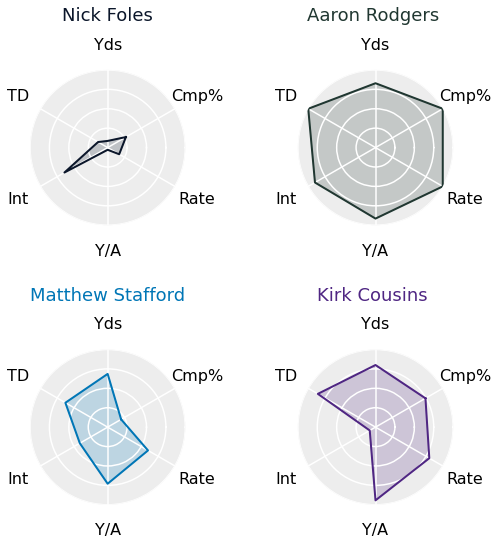

In [121]:
# NFC NORTH
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
chi_data = get_qb_data(data_radar_filtered, 'CHI')
gnb_data = get_qb_data(data_radar_filtered, 'GNB')
det_data = get_qb_data(data_radar_filtered, 'DET')
min_data = get_qb_data(data_radar_filtered, 'MIN')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, chi_data, team_colors['CHI'])
ax2 = create_radar_chart(ax2, angles, gnb_data, team_colors['GNB'])
ax3 = create_radar_chart(ax3, angles, det_data, team_colors['DET'])
ax4 = create_radar_chart(ax4, angles, min_data, team_colors['MIN'])

plt.show()

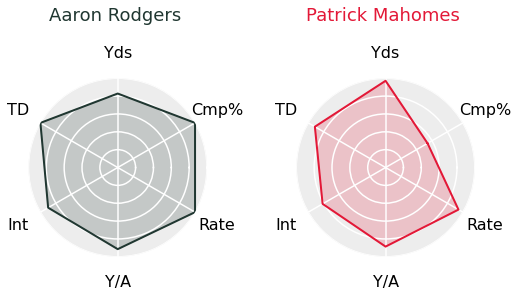

In [124]:
# MVP Race
# Create figure
fig = plt.figure(figsize=(8, 4), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(121, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(122, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
gnb_data = get_qb_data(data_radar_filtered, 'GNB')
kan_data = get_qb_data(data_radar_filtered, 'KAN')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, gnb_data, team_colors['GNB'])
ax2 = create_radar_chart(ax2, angles, kan_data, team_colors['KAN'])

plt.show()

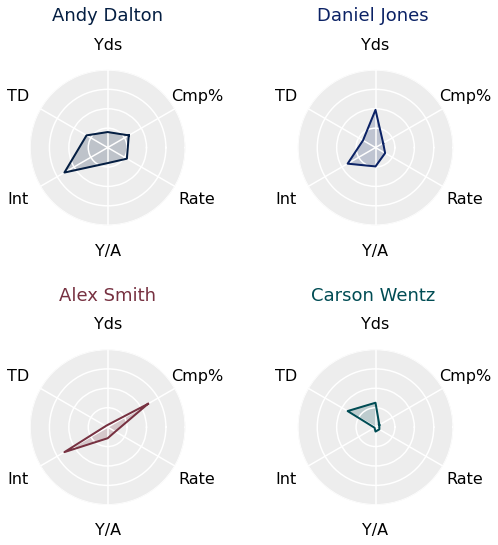

In [125]:
# NFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
dal_data = get_qb_data(data_radar_filtered, 'DAL')
nyg_data = get_qb_data(data_radar_filtered, 'NYG')
was_data = get_qb_data(data_radar_filtered, 'WAS')
phi_data = get_qb_data(data_radar_filtered, 'PHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, dal_data, team_colors['DAL'])
ax2 = create_radar_chart(ax2, angles, nyg_data, team_colors['NYG'])
ax3 = create_radar_chart(ax3, angles, was_data, team_colors['WAS'])
ax4 = create_radar_chart(ax4, angles, phi_data, team_colors['PHI'])

plt.show()


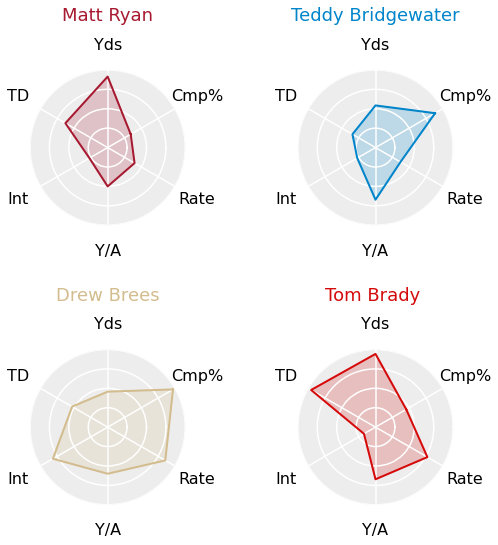

In [127]:

# NFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
atl_data = get_qb_data(data_radar_filtered, 'ATL')
car_data = get_qb_data(data_radar_filtered, 'CAR')
nor_data = get_qb_data(data_radar_filtered, 'NOR')
tam_data = get_qb_data(data_radar_filtered, 'TAM')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, atl_data, team_colors['ATL'])
ax2 = create_radar_chart(ax2, angles, car_data, team_colors['CAR'])
ax3 = create_radar_chart(ax3, angles, nor_data, team_colors['NOR'])
ax4 = create_radar_chart(ax4, angles, tam_data, team_colors['TAM'])

plt.show()

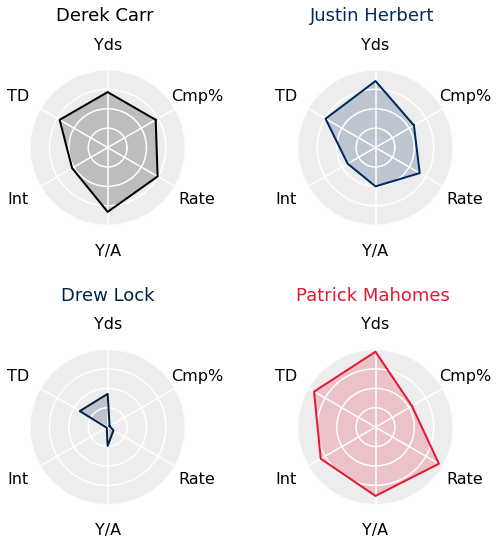

In [135]:
# AFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
lvr_data = get_qb_data(data_radar_filtered, 'LVR')
lac_data = get_qb_data(data_radar_filtered, 'LAC')
den_data = get_qb_data(data_radar_filtered, 'DEN')
kan_data = get_qb_data(data_radar_filtered, 'KAN')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, lvr_data, team_colors['LVR'])
ax2 = create_radar_chart(ax2, angles, lac_data, team_colors['LAC'])
ax3 = create_radar_chart(ax3, angles, den_data, team_colors['DEN'])
ax4 = create_radar_chart(ax4, angles, kan_data, team_colors['KAN'])

plt.show()

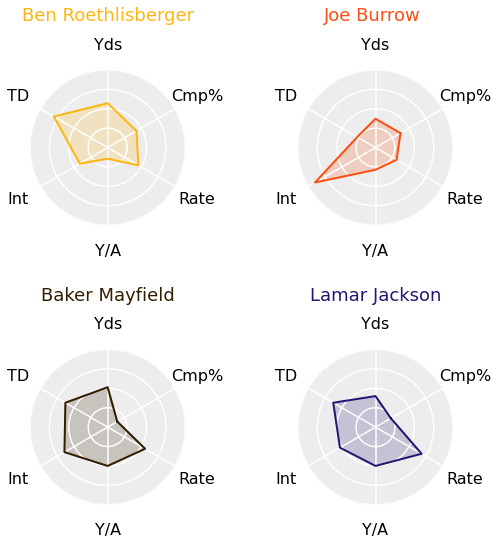

In [130]:
# AFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
pit_data = get_qb_data(data_radar_filtered, 'PIT')
cin_data = get_qb_data(data_radar_filtered, 'CIN')
cle_data = get_qb_data(data_radar_filtered, 'CLE')
bal_data = get_qb_data(data_radar_filtered, 'BAL')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, pit_data, team_colors['PIT'])
ax2 = create_radar_chart(ax2, angles, cin_data, team_colors['CIN'])
ax3 = create_radar_chart(ax3, angles, cle_data, team_colors['CLE'])
ax4 = create_radar_chart(ax4, angles, bal_data, team_colors['BAL'])

plt.show()

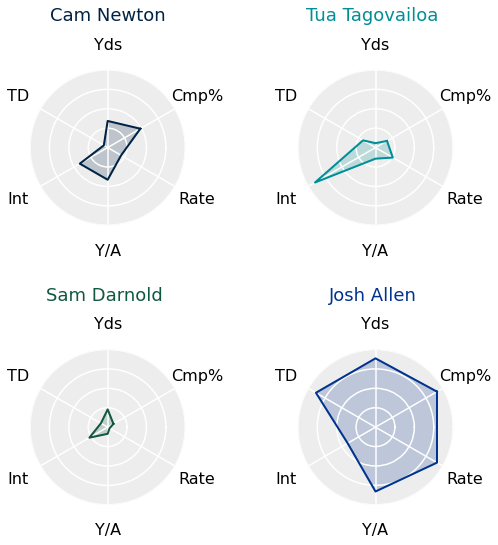

In [131]:
# AFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
nwe_data = get_qb_data(data_radar_filtered, 'NWE')
mia_data = get_qb_data(data_radar_filtered, 'MIA')
nyj_data = get_qb_data(data_radar_filtered, 'NYJ')
buf_data = get_qb_data(data_radar_filtered, 'BUF')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, nwe_data, team_colors['NWE'])
ax2 = create_radar_chart(ax2, angles, mia_data, team_colors['MIA'])
ax3 = create_radar_chart(ax3, angles, nyj_data, team_colors['NYJ'])
ax4 = create_radar_chart(ax4, angles, buf_data, team_colors['BUF'])

plt.show()

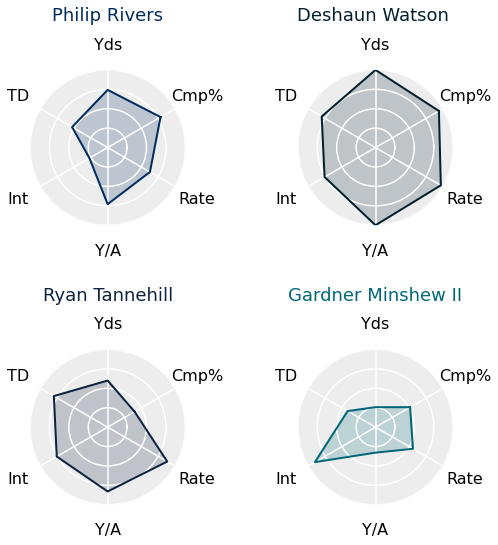

In [132]:
# AFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
ind_data = get_qb_data(data_radar_filtered, 'IND')
hou_data = get_qb_data(data_radar_filtered, 'HOU')
ten_data = get_qb_data(data_radar_filtered, 'TEN')
jax_data = get_qb_data(data_radar_filtered, 'JAX')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, ind_data, team_colors['IND'])
ax2 = create_radar_chart(ax2, angles, hou_data, team_colors['HOU'])
ax3 = create_radar_chart(ax3, angles, ten_data, team_colors['TEN'])
ax4 = create_radar_chart(ax4, angles, jax_data, team_colors['JAX'])

plt.show()

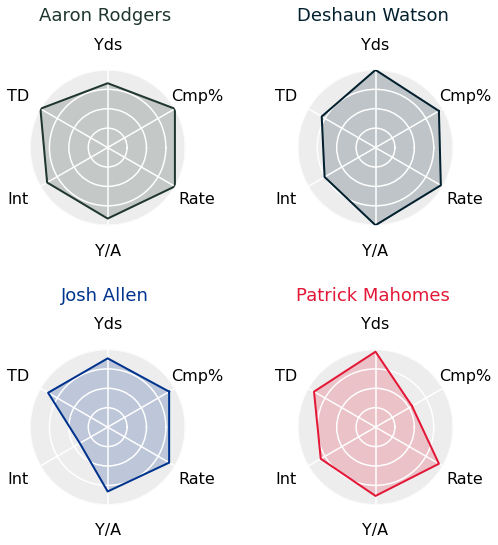

In [138]:
# TOP QBs
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')


# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
gnb_data = get_qb_data(data_radar_filtered, 'GNB')
hou_data = get_qb_data(data_radar_filtered, 'HOU')
buf_data = get_qb_data(data_radar_filtered, 'BUF')
kan_data = get_qb_data(data_radar_filtered, 'KAN')


# Plot QB data
ax1 = create_radar_chart(ax1, angles, gnb_data, team_colors['GNB'])
ax2 = create_radar_chart(ax2, angles, hou_data, team_colors['HOU'])
ax3 = create_radar_chart(ax3, angles, buf_data, team_colors['BUF'])
ax4 = create_radar_chart(ax4, angles, kan_data, team_colors['KAN'])

plt.show()